In [1]:
import torch
import numpy as np

np.random.seed(1)

import os, sys
m_path = os.path.abspath(os.path.join("..\.."))
if m_path not in sys.path:
    sys.path.append(m_path)

In [2]:
from xcloth.production import XCloth

xcloth = XCloth()
for name, params in list(xcloth.named_parameters()):
    print(name)

encoder.conv2d.weight
encoder.conv2d.bias
encoder.downsampling.0.conv.weight
encoder.downsampling.0.conv.bias
encoder.downsampling.0.norm.weight
encoder.downsampling.0.norm.bias
encoder.downsampling.1.conv.weight
encoder.downsampling.1.conv.bias
encoder.downsampling.1.norm.weight
encoder.downsampling.1.norm.bias
encoder.res_blocks1.0.conv1.weight
encoder.res_blocks1.0.bn1.weight
encoder.res_blocks1.0.bn1.bias
encoder.res_blocks1.0.conv2.weight
encoder.res_blocks1.0.bn2.weight
encoder.res_blocks1.0.bn2.bias
encoder.res_blocks1.0.conv3.weight
encoder.res_blocks1.0.bn3.weight
encoder.res_blocks1.0.bn3.bias
encoder.res_blocks1.1.conv1.weight
encoder.res_blocks1.1.bn1.weight
encoder.res_blocks1.1.bn1.bias
encoder.res_blocks1.1.conv2.weight
encoder.res_blocks1.1.bn2.weight
encoder.res_blocks1.1.bn2.bias
encoder.res_blocks1.1.conv3.weight
encoder.res_blocks1.1.bn3.weight
encoder.res_blocks1.1.bn3.bias
encoder.res_blocks1.2.conv1.weight
encoder.res_blocks1.2.bn1.weight
encoder.res_blocks1.2.bn

In [4]:
import pytorch3d
from pytorch3d.io import load_obj
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    TexturesAtlas,
    FoVPerspectiveCameras,
    RasterizationSettings,
    MeshRasterizer,
    MeshRenderer,
    SoftPhongShader,
    look_at_view_transform
)

dress_path = "../no_git_test_data/88-1/model_cleaned.obj"
shirt_path = "../no_git_test_data/11-1/model_cleaned.obj"

ImportError: DLL load failed while importing win32file: The specified procedure could not be found.

In [ ]:
verts, faces, aux = load_obj(dress_path, create_texture_atlas=True, load_textures=True)
meshes_dress = Meshes(
    verts=[verts],
    faces=[faces.verts_idx],
    textures=TexturesAtlas(atlas=[aux.texture_atlas])
)

In [ ]:
verts[:, 2].max()

tensor(0.1369)

In [ ]:
# verts, faces, aux = load_obj(shirt_path, create_texture_atlas=True, load_textures=True)
# meshes_shirt = Meshes(
#     verts=[verts],
#     faces=[faces.verts_idx],
#     textures=TexturesAtlas(atlas=[aux.texture_atlas])
# )

In [ ]:
R, T = look_at_view_transform(1)
cameras = FoVPerspectiveCameras(R=R, T=T)

In [ ]:
rasterizer = MeshRasterizer(
    cameras=cameras,
    raster_settings=RasterizationSettings(image_size=(512, 512), blur_radius=0, faces_per_pixel=1)
)
shader = SoftPhongShader(
    cameras=cameras
)
renderer = MeshRenderer(rasterizer, shader)

(-0.5, 255.5, 255.5, -0.5)

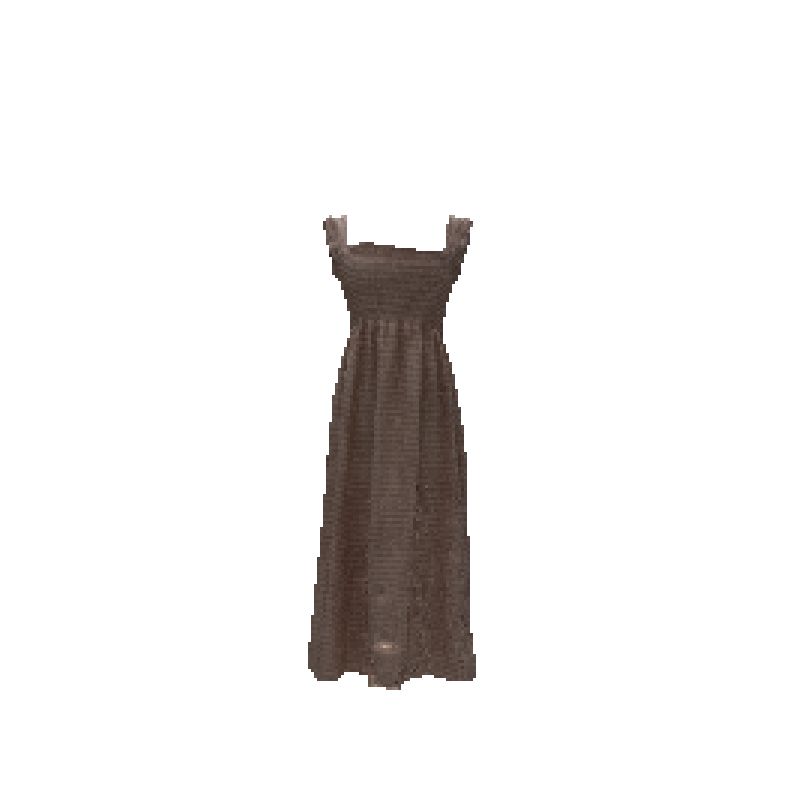

In [15]:
from matplotlib import pyplot as plt
image = renderer(meshes_dress)

plt.figure(figsize=(10, 10))
plt.imshow(image[0, ..., :3].numpy())
plt.grid(False)
plt.axis(False)

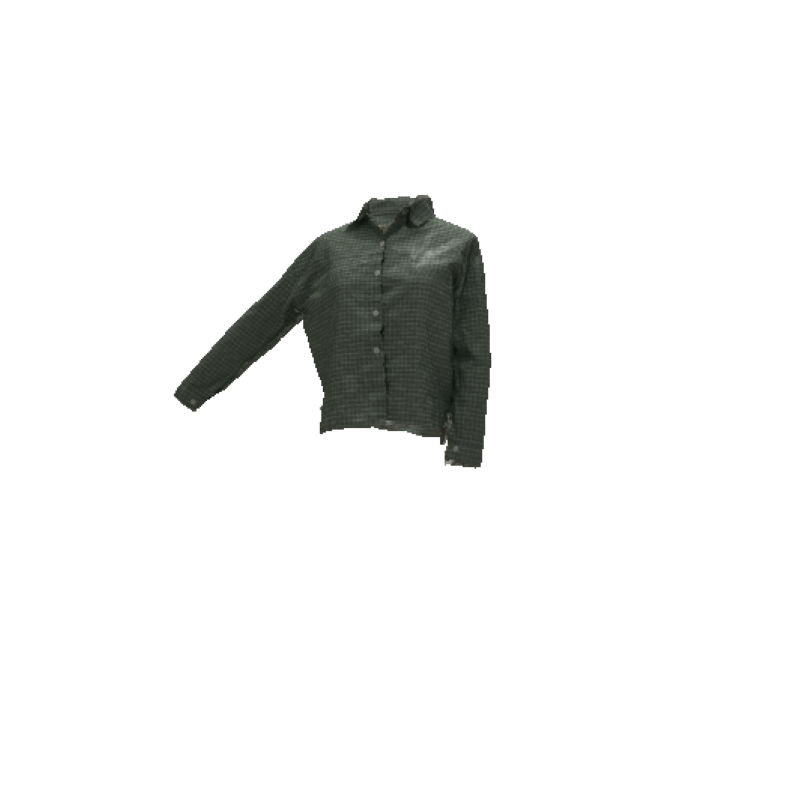

In [ ]:
image = renderer(meshes_shirt)

plt.figure(figsize=(10, 10))
plt.imshow(image[0, ..., :3].numpy())
plt.grid(False)
plt.axis(False)

plt.savefig("clothes.png")